<a href="https://colab.research.google.com/github/ThaddeusOwl/CatClassify/blob/main/CatClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [61]:
from fastai.vision.widgets import *

In [3]:
# !pip install -q jmd_imagescraper

In [4]:
# from pathlib import Path
# root = Path().cwd()/"images"

# from jmd_imagescraper.core import *

In [ ]:
# # duckduckgo_search(root, "Cats", "cute kittens", max_results=100)
# duckduckgo_search(root, "Dogs", "cute puppies", max_results=100)

In [21]:
# def search_images(term, max=10):
#   print(f"Searching for '{term}'")
#   # search_images_ddg comes from fastbook: https://github.com/fastai/fastbook/blob/master/utils.py#L45
#   return search_images_ddg(term, max_images=max)

urls = search_images_ddg("cats eating ice cream", max_images = 10)


In [22]:
urls

(#100) ['https://cattime.com/wp-content/uploads/sites/14/2019/06/Cats_Ice_Cream_2.jpg','https://www.loveyourcat.com/wp-content/uploads/2023/04/orange-tabby-cat-about-to-eat-a-ice-cream-cone-900x500.jpg','https://i.ytimg.com/vi/1Seo5qL7ok0/maxresdefault.jpg','https://i.pinimg.com/originals/84/42/25/844225f3830fe8d86ea3dac782de00de.jpg','https://a57.foxnews.com/a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2020/06/640/320/1862/1048/iStock-475579444.jpg?ve=1&tl=1?ve=1&tl=1','http://www.disruptiveproactivity.com/wp-content/uploads/2011/05/cat-kitten-with-ice-cream-cone-on-head_.jpg','https://i.pinimg.com/originals/4f/a5/d0/4fa5d0021750cd7ed32c037cf50fc750.jpg','https://i.pinimg.com/originals/3e/b3/88/3eb388095e7de55f71bff4fc71d8bd3a.jpg','https://i.pinimg.com/originals/f4/e1/72/f4e1724721fe4dd5bcac1bc56fa082ca.jpg','https://img.buzzfeed.com/buzzfeed-static/static/enhanced/terminal05/2012/3/2/11/enhanced-buzz-7411-1330707160-12.jpg'...]

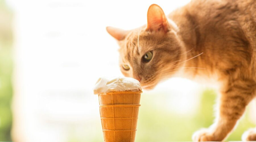

In [23]:
download_url(urls[1], "images/catice2.jpg")
im = Image.open("images/catice2.jpg")
im.thumbnail((256,256))
im

In [24]:
len(urls)


100

In [37]:
cat_types = 'fluffy','wild','cartoon'
path = Path('cat_pics')

In [38]:
if not path.exists():
    path.mkdir()
    for o in cat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} cat', max_images = 150)
        # results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [39]:
fns = get_image_files(path)
fns

(#403) [Path('cat_pics/wild/88f6dec0-bdb2-4436-ab3f-1a1044327510.jpg'),Path('cat_pics/wild/6b5191a5-0fc3-4c77-b1e9-0bccb348f90d.jpg'),Path('cat_pics/wild/3fead224-00b2-4dbb-a787-663ea0582e9e.jpg'),Path('cat_pics/wild/c4180844-fd3a-4586-95e5-30c4152b2888.jpg'),Path('cat_pics/wild/3767901d-3a98-4cb6-bd6b-1e9cdf09dfff.jpeg'),Path('cat_pics/wild/b6f8dc95-209c-4e77-862f-5f4d78ce4e34.jpg'),Path('cat_pics/wild/34e99de7-3183-4894-85c6-bd8c2cd6851d.jpg'),Path('cat_pics/wild/39e80af2-9247-431a-b2a1-8cdc69678ee1.jpg'),Path('cat_pics/wild/54021681-b874-445c-bfa7-0cde4de4adce.jpg'),Path('cat_pics/wild/eff09296-0303-4589-9d50-ef799978fd0b.jpg')...]

In [40]:
failed = verify_images(fns)
failed

(#11) [Path('cat_pics/wild/3767901d-3a98-4cb6-bd6b-1e9cdf09dfff.jpeg'),Path('cat_pics/wild/03724734-4c5a-422a-b5ed-0c08ad187a91.jpg'),Path('cat_pics/wild/c3eaa278-1e5f-46be-bb6f-6f020d100e9a.jpg'),Path('cat_pics/wild/83202b8e-e696-4282-a9cc-6d6b34b28829.jpg'),Path('cat_pics/wild/ca2a9344-841f-4224-9fbb-4b639c5554f0.jpg'),Path('cat_pics/wild/36d1f8ff-aea0-457f-bb35-55b8c11b61f6.jpg'),Path('cat_pics/wild/70968bbf-be29-4fda-85c9-48306f76125b.jpg'),Path('cat_pics/wild/b8e9b551-9be1-4b92-babe-6f16d1854bd8.jpg'),Path('cat_pics/wild/6faff50e-befe-4007-aa45-e6a0f370f2f0.jpg'),Path('cat_pics/fluffy/24af14cb-3b52-4229-855f-65f437ba1468.jpg')...]

In [41]:
failed.map(Path.unlink);

In [42]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [52]:
# cats = cats.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = cats.dataloaders(path)

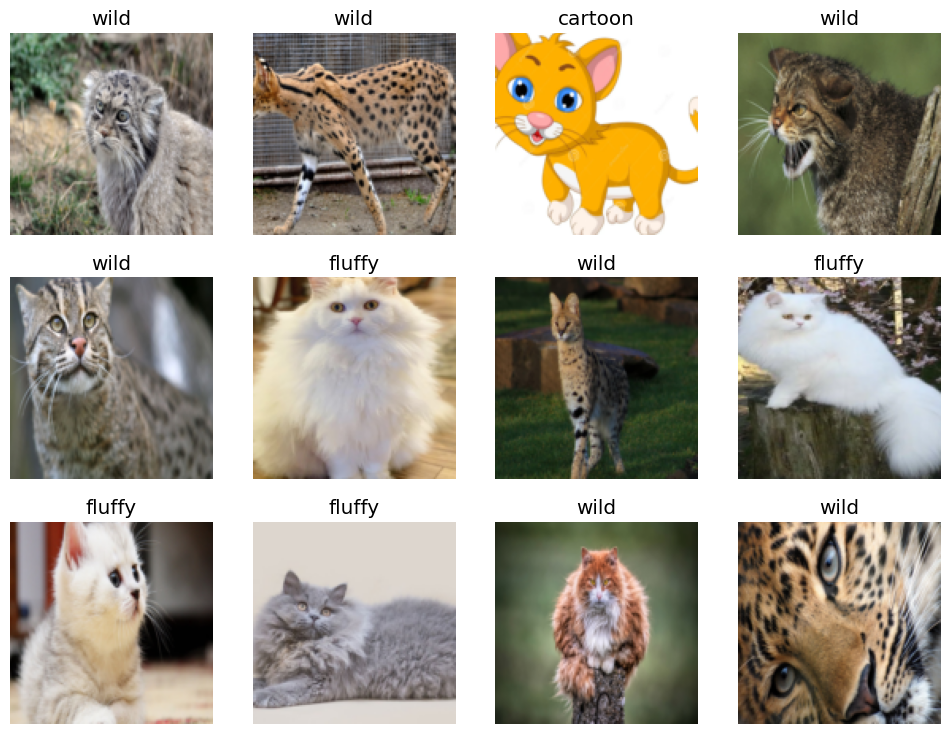

In [55]:
# dls.valid.show_batch(max_n=12, nrows=3)

In [56]:
cats = cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cats.dataloaders(path)

In [57]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


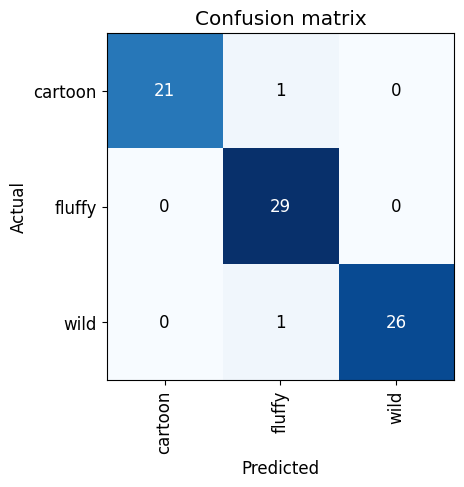

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

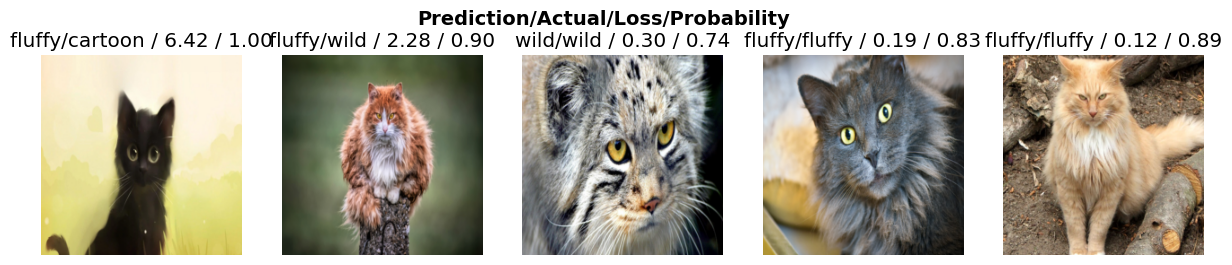

In [59]:
interp.plot_top_losses(5, nrows=1)

In [62]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [64]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [65]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [66]:
learn.export()

In [67]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [68]:
learn_inf = load_learner(path/'export.pkl')

In [70]:
learn_inf.predict('images/catice2.jpg')

('wild', tensor(2), tensor([0.1362, 0.0859, 0.7779]))

In [71]:
learn_inf.dls.vocab

['cartoon', 'fluffy', 'wild']

In [72]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [73]:
img = PILImage.create(btn_upload.data[-1])

In [74]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [77]:
pred,pred_idx,probs = learn_inf.predict(img)

In [78]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: fluffy; Probability: 0.9824')